# Predicting Car Prices with k-nearest neighbors algorithm
In this example project we will use the k-nearest neighbors algorithm to predict a car's market price using its attributes. The dataset we are using is provided by UCI's Machine Learning Repository:

* <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/automobile">Data explanation</a>
* <a target="_blank" href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">Download Data</a>

## Importing the Data
First we import the data into a pandas dataframe

In [353]:
import pandas as pd
cars = pd.read_csv('imports-85.data')
cars.head(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


Since the column labels are not present in the dataset, we are going to add them 

In [354]:
column_labels = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
                'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',
                 'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg',
                 'highway-mpg','price']
cars.columns = column_labels
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


## Choosing numerical columns (Target & Features)
Since we are predicting the price, the column "price" will be our target. For the features we pick the numerical columns ('symboling' is not included as it is a category). For the sake of simplicity we also define a subset of our dataset containing only the features and target columns.

In [355]:
target = ['price']
features = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
            'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
cars_numerical = cars[features + target]
cars_numerical.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


## Dealing with Missing and unusual values

In [356]:
cars_numerical.columns[cars_numerical.isnull().any()]

Index([], dtype='object')

In [357]:
cars_numerical['price'].value_counts()

?        4
7295     2
7775     2
7609     2
7957     2
        ..
16925    1
6785     1
17075    1
32250    1
5499     1
Name: price, Length: 186, dtype: int64

There are no null values, but there are values '?' in some columns (e.g. 'normalized-losses' & 'price'). We are replacing these values by numpy nan - As they are treated as strings, we need then to convert the values to float. 

In [358]:
import numpy as np
cars_numerical = cars_numerical.replace('?',np.nan)
cars_numerical.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [359]:
cars_numerical = cars_numerical.astype('float')
cars_numerical.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [360]:
#For the column 'normalized-losses' we have 40 null values, this represent around 20% of the values - 
#I will just drop this column entirely
#40/len(cars_numerical)
cars_numerical = cars_numerical.drop('normalized-losses', axis=1)

In [361]:
#The other columns have very few null values - I will drop these rows
cars_numerical = cars_numerical.dropna(axis=0)
cars_numerical.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Since I have deleted one of the columns, I update the features list:

In [362]:
features = ['wheel-base','length','width','height','curb-weight','engine-size',
            'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

## Normalizing values
To prevent any single column from having too much of an impact on the predictions, we can normalize all of the columns to have a mean of 0 and a standard deviation of 1 - We normalize all columnns to range from 0 to 1 except the target column.

In [363]:
normalized_cars_numerical = (cars_numerical - cars_numerical.min()) / (cars_numerical.max() - cars_numerical.min())
normalized_cars_numerical['price'] = cars_numerical['price']

## k-nearest neighbors - Univariate Model
Now we can start with the fun :-) First we start with a simple model (one feature: univariate) and later we move to more complex models. For this purpose I create a funciton knn_train_test() that contains the training and simple validation process.

In [364]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#function for one feature k fix
def knn_train_test_uni(train_col, target_col, df):
    knn = KNeighborsRegressor() # default: n_neighbors=5
    np.random.seed(1)    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
   
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set & select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    
    return rmse

Now I test all numerical columns with the default k value to verify which one performs best

In [365]:
# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
rmse_results = {}
for feature in features:
    rmse = knn_train_test_uni(feature,'price',normalized_cars_numerical)
    rmse_results[feature] = rmse
rmse_results

# Create a Series object from the dictionary so we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3442.114000
width                3459.835329
city-mpg             3626.717088
highway-mpg          3824.369189
curb-weight          3886.381323
horsepower           4317.848762
length               4977.246370
wheel-base           5362.805476
compression-ratio    6844.477913
bore                 7086.708240
peak-rpm             7291.640751
height               7775.950777
stroke               8543.342418
dtype: float64

Now we modify the knn_train_test() function to accept a parameter for the k value (1, 3, 5, 7, and 9) and test for all features

In [366]:
#function for one feature with variable k
def knn_train_test_uni(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in features:
    rmse_val = knn_train_test_uni(col, 'price', normalized_cars_numerical)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'wheel-base': {1: 5727.277872143299,
  3: 6403.120777995251,
  5: 5362.805475748831,
  7: 5475.989609854782,
  9: 5721.075826790266},
 'length': {1: 5100.14314029973,
  3: 4742.466517189833,
  5: 4977.2463702436,
  7: 5189.816080589672,
  9: 5164.409393653988},
 'width': {1: 5378.61706922138,
  3: 4336.680404425256,
  5: 3459.8353294942367,
  7: 3688.025236629089,
  9: 4148.1256837027395},
 'height': {1: 8661.63985866632,
  3: 7651.399021203404,
  5: 7775.950777335617,
  7: 7569.743956516674,
  9: 7502.4115362060365},
 'curb-weight': {1: 5406.946936604587,
  3: 4237.203118167078,
  5: 3886.381323194927,
  7: 3658.2124643686902,
  9: 3885.822607917941},
 'engine-size': {1: 3363.939622452394,
  3: 3104.2831551288123,
  5: 3442.1139999811135,
  7: 3676.733978346527,
  9: 3598.7877788612936},
 'bore': {1: 6328.7265742443315,
  3: 6055.867576794814,
  5: 7086.708240253314,
  7: 6784.730072147606,
  9: 6849.575938524207},
 'stroke': {1: 10473.572303365001,
  3: 8298.310238502354,
  5: 8543.

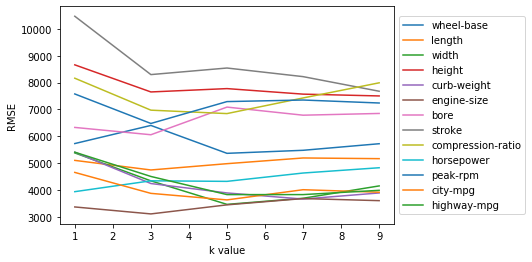

In [367]:
import matplotlib.pyplot as plt
%matplotlib inline
legend_list = []
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    legend_list.append(k)
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(legend_list,loc='center left', bbox_to_anchor=(1, 0.5))

In [368]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = list(sorted_series_avg_rmse.index)

engine-size          3437.171707
city-mpg             4013.697974
width                4202.256745
curb-weight          4214.913290
highway-mpg          4307.848728
horsepower           4408.853495
length               5034.816300
wheel-base           5738.053913
bore                 6621.121680
peak-rpm             7186.818245
compression-ratio    7479.802199
height               7832.229030
stroke               8643.054554
dtype: float64


So the smallest rmse is indeed achieved for:
1. 'engine-size' 
2. 'city-mpg'
3. 'width' 

In [370]:
sorted_features

['engine-size',
 'city-mpg',
 'width',
 'curb-weight',
 'highway-mpg',
 'horsepower',
 'length',
 'wheel-base',
 'bore',
 'peak-rpm',
 'compression-ratio',
 'height',
 'stroke']

## k-nearest neighbors - Multivariate  Model
Now we compute the best features in the algorithm and test with k = 5

In [371]:
#function for multiple features with k fix
def knn_train_test_multi(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test_multi(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars_numerical
    )

k_rmse_results

{'2 best features': {5: 3389.622785204776},
 '3 best features': {5: 3247.8163256176376},
 '4 best features': {5: 3079.3506446960027},
 '5 best features': {5: 3073.1081717804723},
 '6 best features': {5: 3091.1455799915075}}

Now we vary the value of K from 1 to 24:

## Hyperparameter Tuning

In [380]:
#function for multiple features with variable k
def knn_train_test_multi_k(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test_multi_k(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars_numerical
    )

k_rmse_results

{'2 best features': {1: 3229.0286433200686,
  2: 3163.277996883456,
  3: 3119.388724923864,
  4: 3354.9670263755215,
  5: 3389.622785204776,
  6: 3293.264633441456,
  7: 3419.097944371951,
  8: 3483.1914676425313,
  9: 3659.92032358325,
  10: 3801.2353812965357,
  11: 3919.4859473105257,
  12: 4061.008954031984,
  13: 4077.0291586680537,
  14: 4143.366579820041,
  15: 4140.994022218627,
  16: 4137.657858012893,
  17: 4096.178578921527,
  18: 4145.857792667798,
  19: 4258.508574869182,
  20: 4338.954335067853,
  21: 4351.684860450007,
  22: 4440.618448661207,
  23: 4492.771258733575,
  24: 4563.313352104899},
 '3 best features': {1: 2994.1507582095123,
  2: 2722.428069349768,
  3: 2928.4623521560625,
  4: 3054.7248208823057,
  5: 3247.8163256176376,
  6: 3333.951022494101,
  7: 3319.9707704563,
  8: 3413.3045762597453,
  9: 3556.96343736389,
  10: 3661.8126245930257,
  11: 3722.413590843548,
  12: 3796.6709493649837,
  13: 3928.9847928608187,
  14: 3842.5256608296363,
  15: 3993.0476423

It is interesting to note that k=1 has the best results (lowest RMSE) for higher number of features (above 4) 

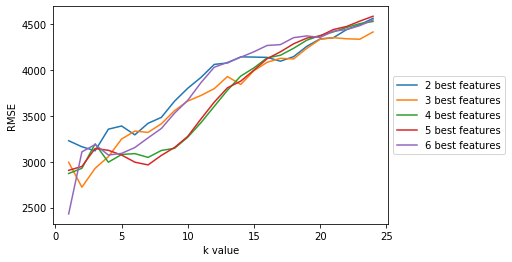

In [381]:
import matplotlib.pyplot as plt
%matplotlib inline
legend_list = []
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    legend_list.append(k)
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(legend_list,loc='center left', bbox_to_anchor=(1, 0.5))